# Logistic Regression (Regresion Logistica)
Repaso.

La funcion de "odds" (chances)

$$ \frac{p}{1-p}  \in [0,  \infty ) \tag{1}.$$
Usamos el logaritmo para hacerla mas simetrica

Planteamos lo que llamamos **regresion logisitica**


$$ \log \frac{p}{1-p} = \theta_0 + \theta_1 x .$$
Ajustamos el log de "odds" a una linea reacta. En general se puede ajustar a un hiperplano y mas adelante a curvas o superficies mas generales (manifolds, variedades).

Resolviendo la ecuacion (1) por $p$ encontramos

$$p = \frac{1}{1 + \mathrm{e}^{-X \theta}} \in (0, 1) .$$
A esta probabilidad se le llama **logistic sigmoid**. Se va a hablar mucho de esto cuando lleguemos a redes neuronales, como **funciones de activacion**.

La redefinimos como


$$S(t) = \frac{1}{1+ \mathrm{e}^{-t}} .$$







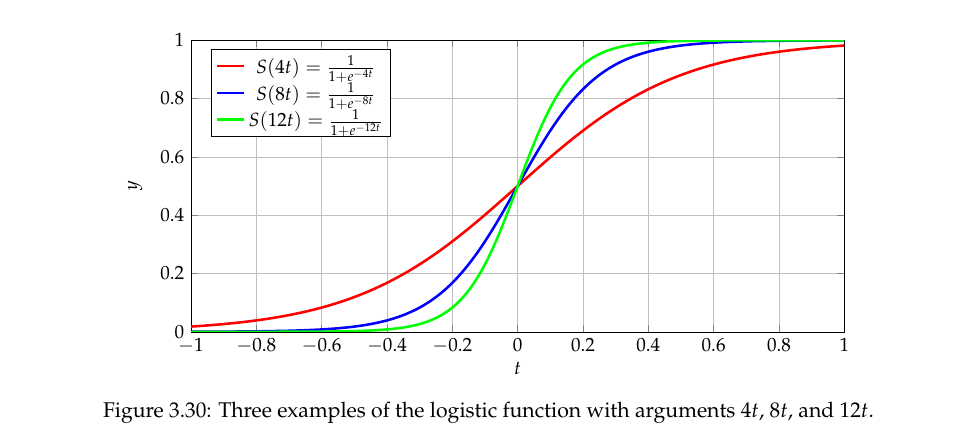

### Derivada la funcion $S(t)$.

$$S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \mathrm{e}^{-t} S^2 (t)  \tag{1A}.$$


Hay otra forma de la derivada.

\begin{eqnarray}
S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \frac{1}{1 + \mathrm{e}^{-t}} \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})} = \frac{1}{1 + \mathrm{e}^{-t}} \left ( 1 - \frac{1}{1 + \mathrm{e}^{-t}} \right ) = S(t) (1 - S(t)).
\end{eqnarray}

## Funcion de costo de la regresion logistica.

Vamos a recapitular sobre que cosas pasadas.

Tenemos en la regresion logistica dos estados $1,0$. Es decir
$y_i=0,1$, $i=1,2, \cdots, m$, inicilamente pensamos de forma ingenua en el sitema


$$ X \Theta = Y \quad , \quad X \in \mathbb{R}^{m \times n} \quad , \quad \Theta \in \mathbb{R}^{n \times 1} \quad , \quad Y \in \mathbb{R}^{m \times 1}  .$$

El problema es que $-\infty < x^{(i)} \Theta < \infty$. Esto es un problema por que $y_i$ es 0 o es 1.

Definimos una hipotesis que se ajuste al problema.


$$h(\Theta, x^{(i)}) = S( x^{(i)} \Theta) = \frac{1}{1 + \mathrm{e}^{- x^{(i)} \Theta}} .$$

Estamos sumergiendonos en el mundo de la estadistica.
La matematica de ML

* Calculo en varias variables
* Algebra lineal
* Estadistica

Podemos pensar en la hipotesis como una **probabilidad**
y escribir

$$ h(\Theta, x^{(i)}) = p( Y^{(i)} = 1 | x^{(i)}, \Theta)  .$$
Como solo tenemos dos opciones $Y^{(i)}=1,0$ entonces

$$ p( Y^{(i)} = 0 | x^{(i)}, \Theta) = 1 -  p( Y^{(i)} = 1 | x^{(i)}, \Theta)  .$$


Ya limitamos (squezeed) el rango al intervalo $(0,1)$, pero
sigue siendo una funcion continua. Entonces esta hipotesis todavia no se ajusta al problema **discreto** de valores $0,1$.

Podemos forzar la hipotesis al mundo discreto mediante un **umbral** (threshold) $\gamma$ (por ejemplo $\gamma=0.5$
de la siguiente forma


$$ h_{binaria}(\Theta, x^{(i)}) =
\left \{
    \begin{array}{cc}
     1 & \text{   si }  S( x^{(i)}) \Theta > \gamma \\
     0 & \text{   si }  S( x^{(i)}) \Theta \le \gamma \\
    \end{array}
\right . $$

Con esta hiptesis **binaria** forzamos el problema del continuo al discreto.


Siguiendo con la funcion de costo. En el caso de la regresion lineal









$$ J(\theta) = \frac12 \| h(\theta, X) - Y \|^2 = \frac12 \sum_{i=1}^m [ h_i(\theta, X) - Y_i ]^2. \tag{2} $$
a veces se pone $1/2m$ en vez de $1/2$ pensando en el **promedio** pero esto no afecta la posicion del minimo.


Esta funcion objetivo, aun cuando $h(\theta) = S(\theta)$ no es adecuada. Sin embargo la funcio $J(\theta)$ como esta definida arriba no es convexa.  


Vamos a ver con un ejemplo simple como esta funcion objetivo no es convexa.

Tomemos un caso muy sencillo. Una sola variable $Y_i=1$, el argumento de la funcion logistica $1 + \theta$. Entonces reemplazando esto en la Ecuacion (2) encontramos
Un solo dato $m=1$.


$$ J(\theta)^{(i)} = \frac12 ( S(1+\theta) -1)^2. \tag{3}$$

Para probar que esta funcion no es convexa hallamos la segunda derivada y vemos que tiene puntos negativos.


Recuerden la formula (1A)

$$S'(t) = \mathrm{e}^{-t} S^2 (t) .$$
* Primera derivada en (3)

$$\frac{d J(\theta)}{d \theta} = (S(1+ \theta)-1) \mathrm{e}^{-1 -\theta} S^2(1 + \theta) =-\mathrm{e}^{-1 - \theta} S^2(1 + \theta) + S^3 (1 + \theta) \mathrm{e}^{-1-\theta} .$$


* Segunda derivada

$$\frac{d^2 J(\theta)}{d \theta^2} = \mathrm{e}^{-1 - \theta} S^2 ( 1 + \theta) - 2 S^3(1+ \theta) \mathrm{e}^{-2 - 2 \theta} + 3 S^4( 1 + \theta) \mathrm{e}^{-2 - 2 \theta} - S^3(1 + \theta) \mathrm{e}^{1-\theta}  .$$

Simplificamos, factorizando $\mathrm{e}^{-1-\theta} S^2(1 + \theta)$

$$\frac{d^2 J(\theta)}{d \theta^2} = \mathrm{e}^{-1 - \theta} S^2(1 + \theta)  \left [ 1 - 2 S(1 + \theta) \mathrm{e}^{-1 - \theta} + 3 S^2(1 + \theta) \mathrm{e}^{-1-\theta} - S(1 + \theta)    \right ] .$$

Numericamente encontramos valores en donde esta segunda derivada sea negativa.

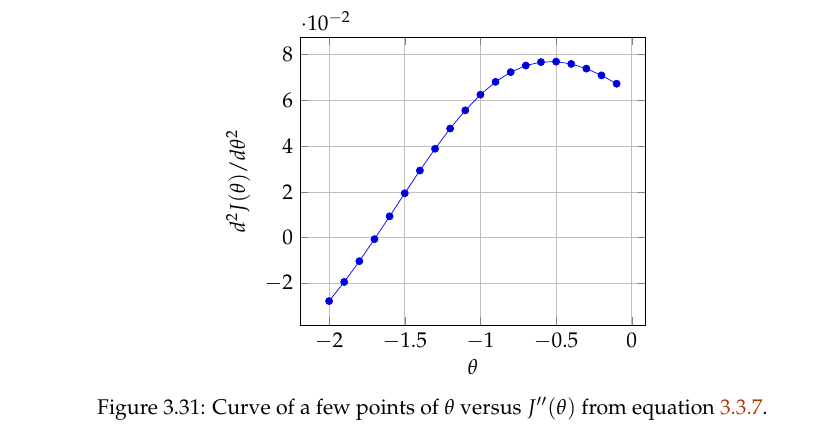

Dado que $J''(-2) < 0$ la funcion no es convexa. Pero ese no es el problema. Si $J''(\theta) < 0$ para todo $\theta$, la funcion seria concava y le ponenmos un signo $-$ y listo, ya seria convexa. Pero, por ejemplo observe que $J''(-0.5)>0$.

De todo este analisis quiero que quede como leccion que si se pueden usar funciones convexas en ML es mejor. Pero esto no siempre es asi.

Hay funciones mucho mas complicadas.

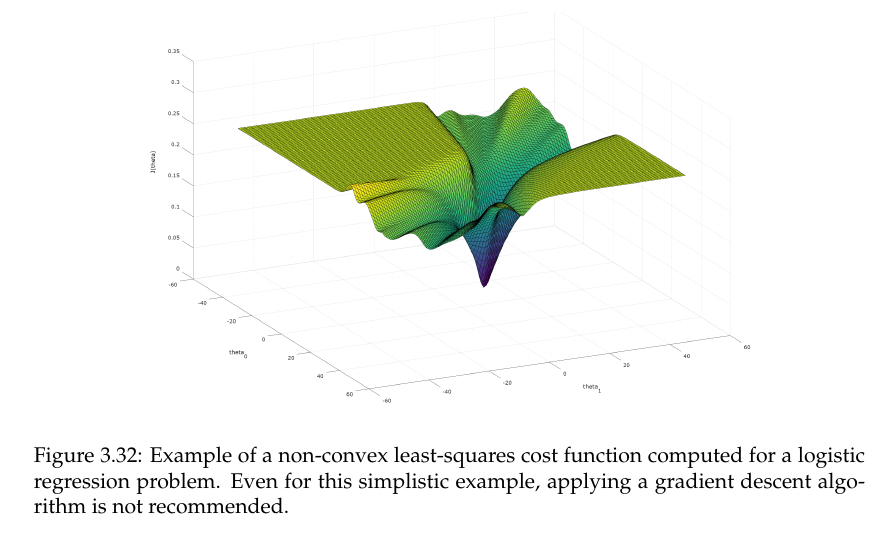

Veamos como formulamos la funcion objetivo para regresion logistica.

Es un problema de clasificacion binaria. Asumamos que tenemos un conjunto de solo gatos y perros y que usamos el modelo probabilisitico


$$h(\theta, x^{(i)}) = p( y_i = \text{gato} | x^{(i)}; \theta) .= S( x^{(i)} \theta)  = \frac{1}{1 + \mathrm{e}^{- x^{(i)} \theta}}$$

Como los gatos y perros son exclusivos

$$p( y_i = \text{perro} | x^{(i)}; \theta) =  1 - p( y_i= \text{gato} | x^{(i)}; \theta) .$$

Estas dos probabilidades se pueden combinar en una sola.


$$p( y_i | x^{(i)} ; \theta) = h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)}))^{1-y_i} .$$



Vamos a hablar de **verosimilitud** (likelihood $\mathcal{L}(\theta)$) donde es la probabilidad sobre un conjunto de datos. Como lo que tenemos en nuestro conjunto son gatos y perros y son **exclusivos** entonces
la probabolidad del producto es el producto de las probabilidades (son **independientes**).

En este sentido

$$\mathcal{L}(\theta) = p( Y | X; \theta) = \prod_{i=1}^m h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)}))^{1 - y_{i}} .$$

Esta se ve como una funcion de costo viable, desde el punto de vista estadistico. Sin embargo los productos son complicados. Piense en la derivada de un producto de 10000 de terminos.
Por esta razon, una vez mas tomamos el logaritmo de la function.

$$\log \mathcal{L}(\theta) = \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) (1 - h(\theta, x^{(i)}) .$$

Esta funcion es concava


$$J(\theta) = - \frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]  .$$

### Gradiente de la funcion objetivo.
Lo hacemos por partes.

* El primer termino **dentro** de la sumatoria.

$$\frac{\partial y_i \log[ h(\theta, x^{(i)})]}{\partial \theta_k} = y_i \frac{1}{S} S' x_{ik} = y_i \frac{1}{S} S(1-S) x_{ik}= y_i (1 -S) x_{ik} . \tag{4} $$

* El segundo termino **dentro** de la sumatoria


$$ \frac{\partial (1- y_i) \log [ 1 - h(\theta, x^{(i)})]}{\partial \theta_k} = -(1 - y_i) \frac{1}{1 -S} S' x_{ik} = (y_i -1) \frac{1}{1 -S} S(1-S) x_{ik} = (y_i-1) S x_{ik}. \tag{5} $$






Combinamos las dos expresiones anteriores


\begin{eqnarray}
\frac{\partial y_i \log[ h(\theta, x^{(i)})]}{\partial \theta_k} +  \frac{\partial (1- y_i) \log [ 1 - h(\theta, x^{(i)})]}{\partial \theta_k} &=&  y_i (1 -S) x_{ik} + (y_i-1) S x_{i} \\
&=& y_i x_{ik} - y_i S x_{ik} + y_i S x_{ik} - S x_{ik}
&=& y_i X_{ik} - S x_{ik} \\
&=& ( y_i - S) x_{ik} \\
&=& -( h( x^{(i)}, \theta) - y_i) x_{(ik})
\end{eqnarray}

Ejecutamos la suma


$$\frac{\partial J(\theta)}{\partial \theta_k} = \frac1m \sum_{i=1}^m ( h(\theta, x^{(i)}) - y_i) x_{ik} .$$

## Decision boundary. Frontera de decision.